<a href="https://colab.research.google.com/github/selika/AI-classifier/blob/main/learn_AI_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Regression 「迴歸」，統計學之術語，用於尋找「正相關」的指標。
如本例，以XGBoost，從在院治療的案例資料集中，極少數在院死亡的個案，
以AI(xgboost)用統計學方法尋找可能與在院死亡相關的指標，並提供預測。

本資料集取於 https://www.kaggle.com/datasets/mitishaagarwal/patient
Patient Survival Prediction


In [26]:
# Code to read csv file into Colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
import pandas as pd 
import numpy as np

In [2]:
import xgboost as xgb
from xgboost import plot_importance
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split

In [3]:
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [4]:
link = 'https://drive.google.com/file/d/1LTxVcbjlItwymKMOrhq73l-eC5-nUHL8/view?usp=sharing'
downloaded = drive.CreateFile({'id':'1LTxVcbjlItwymKMOrhq73l-eC5-nUHL8'}) 

In [9]:
downloaded.GetContentFile('dataset.csv')  
df = pd.read_csv('dataset.csv', delimiter=',')
DataValues = [list(row) for row in df.values]

In [6]:
ColumnNames = df.columns

In [10]:
#Create the Data Frame
GymData=pd.DataFrame(data=DataValues,columns=ColumnNames)
GymData.head()
 

,encounter_id,patient_id,hospital_id,age,bmi,elective_surgery,ethnicity,gender,height,icu_admit_source,...,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem,Unnamed: 83,hospital_death
0,66154,25312,118,68.0,22.73,0,Caucasian,M,180.3,Floor,...,1.0,0.0,0.0,0.0,0.0,0.0,Sepsis,Cardiovascular,NaN,0
1,114252,59342,81,77.0,27.42,0,Caucasian,F,160.0,Floor,...,1.0,0.0,0.0,0.0,0.0,0.0,Respiratory,Respiratory,NaN,0
2,119783,50777,118,25.0,31.95,0,Caucasian,F,172.7,Accident & Emergency,...,0.0,0.0,0.0,0.0,0.0,0.0,Metabolic,Metabolic,NaN,0
3,79267,46918,118,81.0,22.64,1,Caucasian,F,165.1,Operating Room / Recovery,...,0.0,0.0,0.0,0.0,0.0,0.0,Cardiovascular,Cardiovascular,NaN,0
4,92056,34377,33,19.0,NaN,0,Caucasian,M,188.0,Accident & Emergency,...,0.0,0.0,0.0,0.0,0.0,0.0,Trauma,Trauma,NaN,0


In [20]:
#Separate Target Variable and Predictor Variables
TargetVariable='hospital_death'
Predictors=['age','bmi','diabetes_mellitus','hepatic_failure']
X=GymData[Predictors].values
y=GymData[TargetVariable].values
 
#Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
 

In [21]:
#Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
 

In [22]:
###### Xgboost Regression in Python #######
from xgboost import XGBRegressor
RegModel=XGBRegressor(max_depth=3, learning_rate=0.1, n_estimators=500, objective='reg:linear', booster='gbtree')
 
#Printing all the parameters of XGBoost
print(RegModel)

XGBRegressor(n_estimators=500)


In [23]:
#Creating the model on Training Data
XGB=RegModel.fit(X_train,y_train)
prediction=XGB.predict(X_test)

[02:52:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [24]:
#Measuring Goodness of fit in Training data
from sklearn import metrics
print('R2 Value:',metrics.r2_score(y_train, XGB.predict(X_train)))

R2 Value: 0.05368103133629765


In [27]:
#Measuring accuracy on Testing Data
print('Accuracy',100- (np.mean(np.abs((y_test - prediction) / y_test)) * 100))

Accuracy -inf


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in true_divide
  


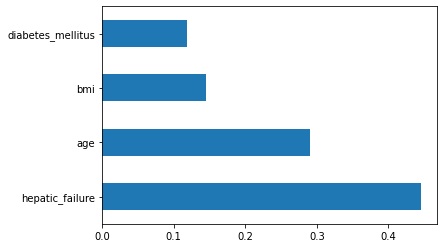

In [28]:
#Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(XGB.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

在院死亡的指標比較相關的是 肝衰竭 hepatic failure

In [33]:
#Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted '+TargetVariable)]=prediction
TestingDataResults.head()

,age,bmi,diabetes_mellitus,hepatic_failure,hospital_death,Predicted hospital_death
0,59.0,20.571429,0.0,0.0,0,0.031975
1,NaN,23.119157,NaN,NaN,0,0.125868
2,48.0,37.487687,0.0,0.0,0,0.043038
3,58.0,32.289347,0.0,0.0,0,0.062524
4,NaN,26.280500,0.0,0.0,1,0.142925
